In [1]:
#导入pandas包，并重命名为pd。
import pandas as pd
#导入numpy包，并重命名为np。
import numpy as np

In [2]:
#通过查阅breast-cancer-wisconsin.names文件，给出每个特征列的名称。
column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
#采用read_csv函数读取breast-cancer-wisconsin.data文件，默认用逗号分隔数据；并存入变量data。
data = pd.read_csv('../datasets/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names=column_names, delimiter=',')

In [3]:
#data为DataFrame数据类型，用head函数展示前5行数据。
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#data包括699组数据，每行数据有11个维度的特征。
data.shape

(699, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
#发现Bare Nuclei列里面的特征数值是非数值（object）类型，因此需要仔细查验；统计一下这列特征的数值频率。
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [7]:
#舍弃掉16行有空值的数据，还剩下683组肿瘤数据。
data = data.replace(to_replace='?', value=np.nan)
data = data.dropna(how='any')

In [8]:
#查看一下肿瘤类别的代表数字，以及各个类别的样本数量。良性肿瘤（2）：444组样本；恶性肿瘤（4）：239组样本。
data['Class'].value_counts()


2    444
4    239
Name: Class, dtype: int64

In [9]:
# data['Class'] = data['Class'].replace(4, 1)
# data['Class'] = data['Class'].replace(2, 0)

In [10]:
# 重新查验data各个特征维度的信息。
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [11]:
from sklearn.model_selection import train_test_split

#将前10列选为特征。
X = data[column_names[1:10]]
#将Class命名的列取出作为待预测的类别。
y = data[column_names[10]]

# 用train_test_split函数来分隔数据，默认情况下这些数据会被随机打乱（shuffle=True）。
# 我们这里分割出25%的数据作为测试集，剩下75%的数据作为训练样本。
# random_state全书设定为一个固定值（2019），为了保证每次重新运行获得的训练集和测试集是一样的，实验结果可重现。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

In [12]:
# 分割之后的训练样本409个。
X_train.shape

(478, 9)

In [13]:
# 分割之后的训练样本274个。
X_test.shape

(205, 9)

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/Users/michael/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/michael/anaconda/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/michael/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  


In [15]:
# 从sklearn.linear_model导入LogisticRegression，用来构建逻辑斯蒂回归模型。
from sklearn.linear_model import LogisticRegression
# 从sklearn.metrics导入accuracy_score，用来做分类准确率的评估。
from sklearn.metrics import accuracy_score

# 初始化逻辑斯蒂回归模型。
lr = LogisticRegression()

# 模型训练。
lr.fit(X_train, y_train)

# 预测的类别结果存入y_predict。
y_predict = lr.predict(X_test)
y_predict_prob = lr.predict_proba(X_test)

print '%s: %f' %('使用逻辑斯蒂回归模型做分类的准确率为', accuracy_score(y_test, y_predict))

使用逻辑斯蒂回归模型做分类的准确率为: 0.970732


/Users/michael/anaconda/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test, y_predict, labels=[2,4])
print con_mat

[[129   3]
 [  3  70]]


In [17]:
from sklearn.metrics import recall_score, precision_score, precision_recall_curve
import numpy as np
print precision_score(y_test, y_predict, pos_label=4)
print recall_score(y_test, y_predict, pos_label=4)

0.958904109589041
0.958904109589041


In [18]:
precisions, recalls, thresholds = precision_recall_curve(y_test, np.max(y_predict_prob, axis=1), pos_label=4)

In [19]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 300 

In [20]:
plt.plot(recalls, precisions)

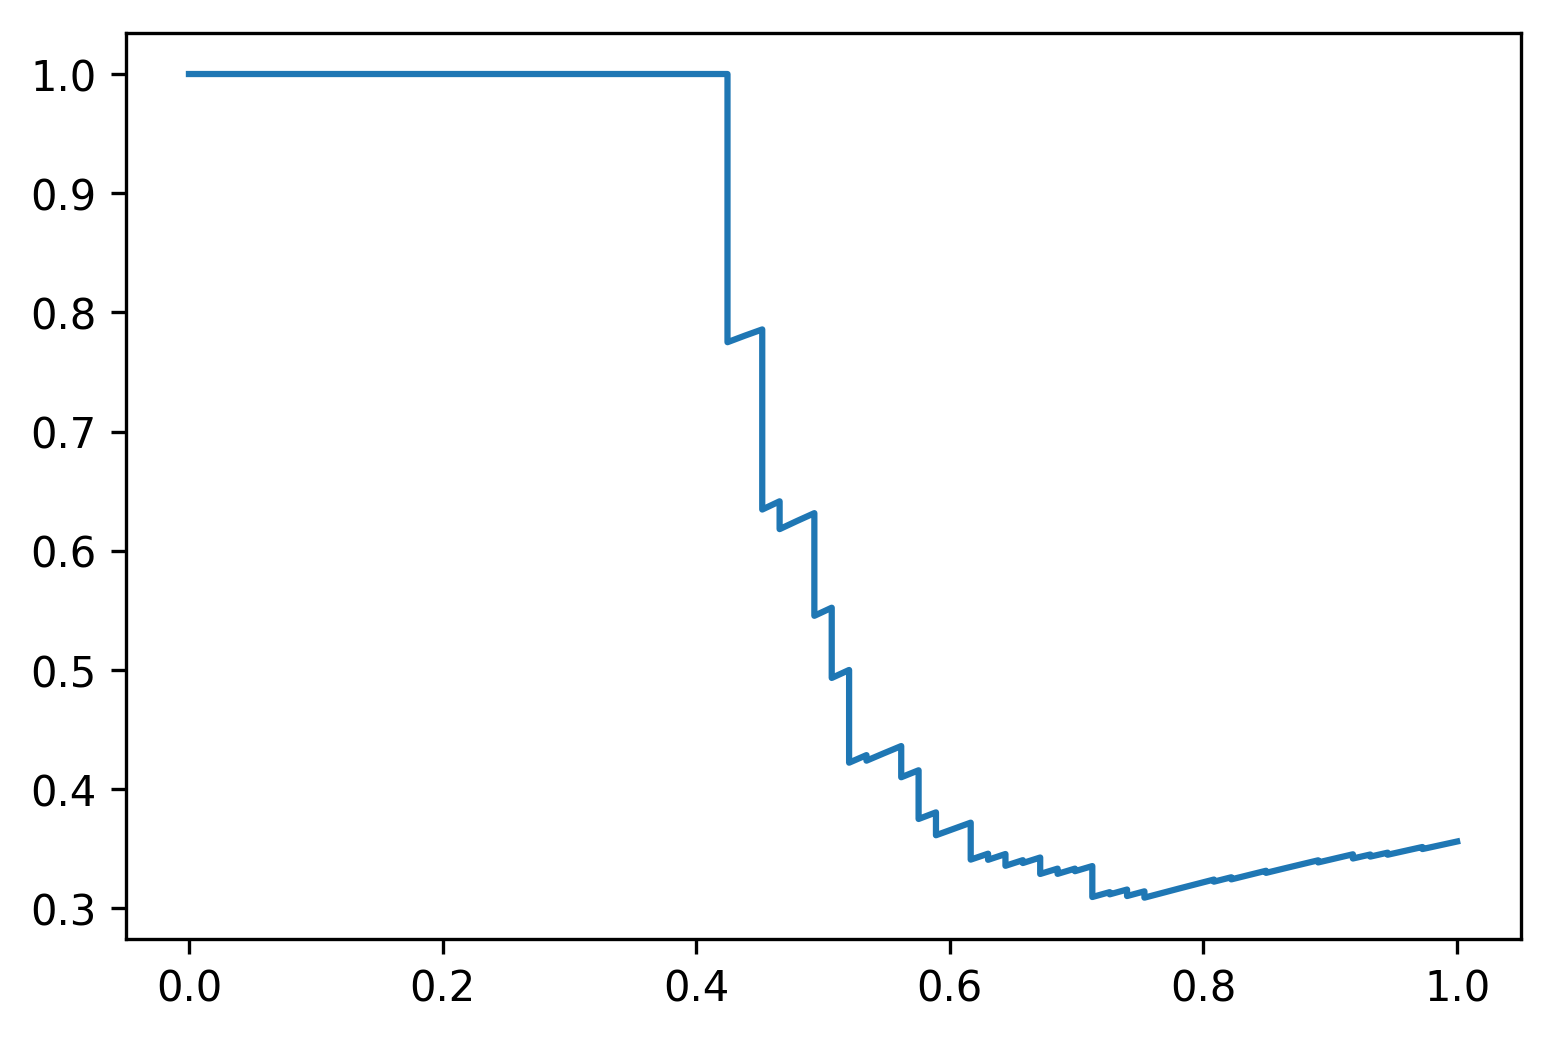

In [21]:
plt.show()